## How to import, process and visualize LAS files in Jupyter Notebook - Part1

### Import required Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
from welly import Well
from welly import Project
welly.__version__
%config InlineBackend.figure_format='svg' # To create high resolution graphics

### Load the LAS file with full path defined. (I am using free LAS files available on the net)

In [7]:
well=Well.from_las(r"E:\Jupyter-NoteBooks\Data\LasPlotting-Data-KU\1047191384.LAS")

d:\Users\sadaq\anaconda3\lib\site-packages\welly\well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [8]:
well.data

{'AVTX': Curve([0., 0., 0., ..., 0., 0., 0.]),
 'BVTX': Curve([0., 0., 0., ..., 0., 0., 0.]),
 'CILD': Curve([28.0956, 27.8014, 27.6169, ...,  0.    ,  0.    ,  0.    ]),
 'CNDL': Curve([28.7135, 27.1314, 26.8694, ...,     nan,     nan,     nan]),
 'CNLS': Curve([35.4908, 34.319 , 34.0718, ...,     nan,     nan,     nan]),
 'CNPOR': Curve([35.4908, 34.319 , 34.0718, ...,     nan,     nan,     nan]),
 'CNSS': Curve([37.9108, 36.89  , 36.6583, ...,     nan,     nan,     nan]),
 'DCAL': Curve([8.29  , 8.2897, 8.2898, ...,    nan,    nan,    nan]),
 'DPOR': Curve([39.249 , 37.7345, 35.4815, ...,     nan,     nan,     nan]),
 'GR': Curve([50.8557, 48.3881, 47.5062, ...,     nan,     nan,     nan]),
 'LSPD': Curve([-31.45, -31.45, -31.2 , ..., -24.79, -22.57, -19.11]),
 'LTEN': Curve([ 826.9373,  822.1664,  817.7341, ..., 1042.9794, 1041.0552,
        1039.365 ]),
 'RHOB': Curve([2.0388, 2.0647, 2.1033, ...,    nan,    nan,    nan]),
 'RHOC': Curve([-0.3275, -0.3332, -0.3443, ...,     nan,  

### Extract the common well name from the LAS file

In [9]:
well.header.name

'HICKS "A" NO. 1-24'

### Extract general header information from the LAS file

In [10]:
well.header

{'name': 'HICKS "A" NO. 1-24', 'uwi': '', 'field': 'WILDCAT', 'api': '15-055-22447-00-00', 'company': 'AMERICAN WARRIOR, INC.'}

### Plot the log curves available in LAS file

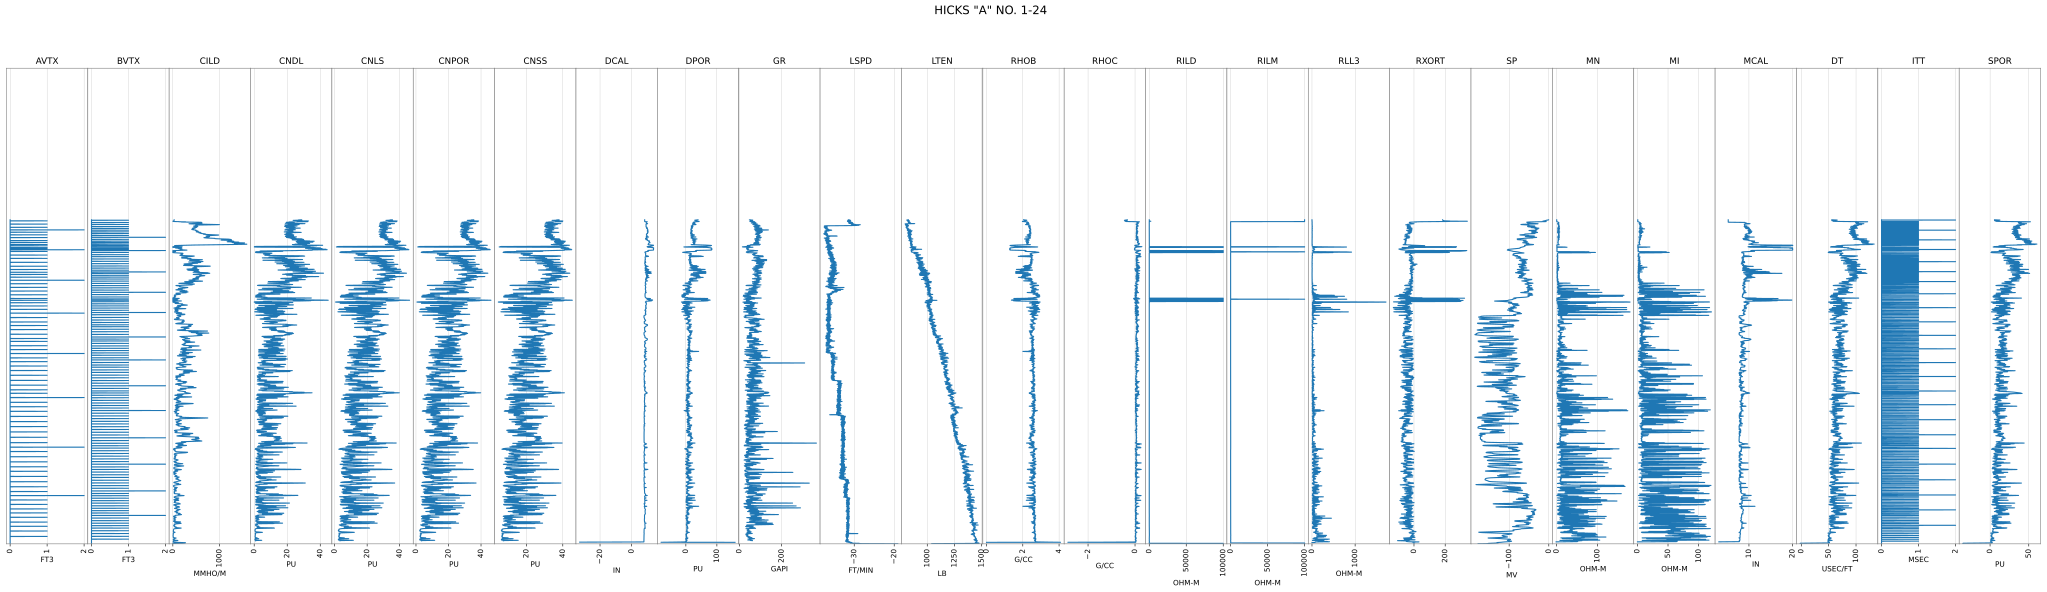

In [11]:
well.plot()

### Let's display the selected well curves, say GR, SP, RHOB and DT

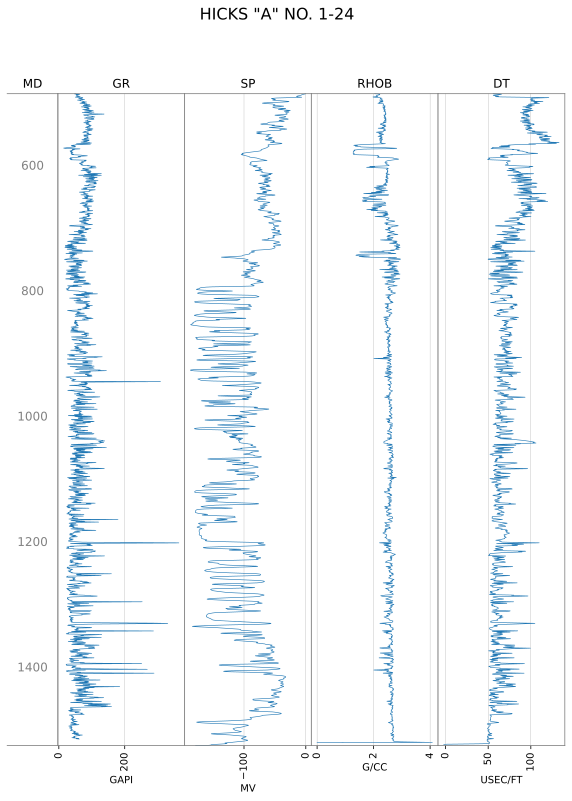

In [12]:
tracks=['MD','GR','SP','RHOB','DT']
well.plot(tracks=tracks,lw=0.6)

### Let's select GR curve to process

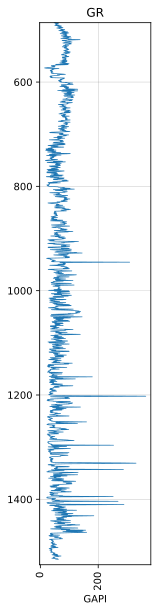

In [13]:
well.data['GR'].plot(lw=0.7)

### We can display information about GR log curve as follows

In [14]:
well.data['GR']

Curve([50.8557, 48.3881, 47.5062, ...,     nan,     nan,     nan])

### We can display the start and end depth of the GR log curve from LAS files

In [15]:
well.data['GR'].start,well.data['GR'].stop

(486.156, 1525.523999999613)

### We can output the value of GR curve at any desired depth, say at 1000 depth unit MD

In [16]:
well.data['GR'].read_at(1000)

62.55113860783109

### We can also print a summary statistics of GR curve 

In [17]:
well.data['GR'].describe()

{'samples': 6821,
 'nulls': 68,
 'mean': 65.14360607137569,
 'min': 14.6421,
 'max': 364.4073}

### Another method to print summary statistics for any curve (GR in this case) is by using get_stats option

In [18]:
well.data['GR'].get_stats()

{'samples': 6821,
 'nulls': 68,
 'mean': 65.14360607137569,
 'min': 14.6421,
 'max': 364.4073}

### Let's Despike GR curve

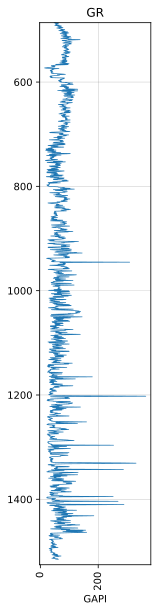

In [19]:
#Display GR curve first to check the spiking parameters required
well.data['GR'].plot(lw=0.7)

### Despiking is controlled by two parameters, window_length and z. We will plot both original and despiked version of log curves in the same track for comparision

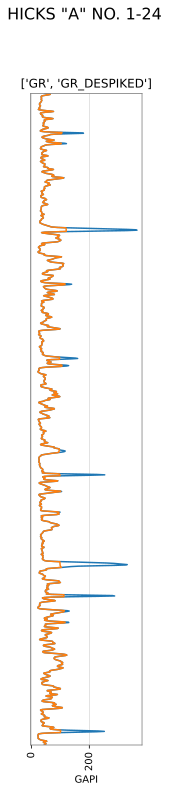

In [20]:
well.data['GR_DESPIKED']=well.data['GR'].despike(window_length=70,z=2)
well.plot(tracks=[['GR','GR_DESPIKED']],extents=(1150,1400))

### Create a color filled version of any log

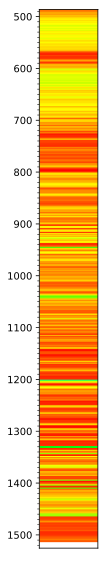

In [21]:
well.data['GR'].plot_2d(cmap='gist_rainbow')

### Let's generate a subset of despiked GR curve between say 500-1500 MD

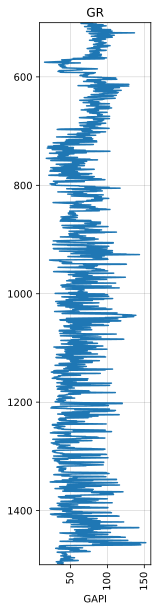

In [22]:
GR_SELECTED=well.data['GR_DESPIKED'].to_basis(start=500,stop=1500)
GR_SELECTED.plot()

### We can color fill the above log from left to right edge within the defined x limits

(20.0, 170.0)

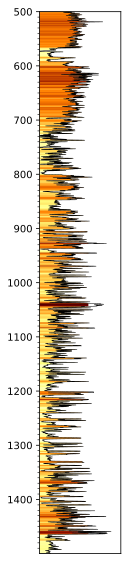

In [23]:
(GR_SELECTED).plot_2d(cmap="afmhot_r",curve=True,lw=0.5,edgecolor="k")
plt.xlim(20,170)